# Analyse Exploratoire des Données (EDA)
### Projet: Analyse des Sentiments des Touristes - Marrakech
**Dataset: 6282 reviews**


### 1. IMPORTATION DES BIBLIOTHÈQUES

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

# Configuration pour de meilleurs graphiques
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Configuration de la taille par défaut des figures
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Pour le NLP
import nltk
from collections import Counter
import re

# Télécharger les ressources NLTK nécessaires
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)
from nltk.corpus import stopwords

In [4]:

# =============================================================================
# 2. CHARGEMENT DES DONNÉES
# =============================================================================

# Charger le dataset
df = pd.read_csv('../data/raw/dataset_marrakech_english.csv')

print("="*80)
print("📊 INFORMATIONS GÉNÉRALES SUR LE DATASET")
print("="*80)
print(f"\n✓ Nombre total de reviews: {len(df)}")
print(f"✓ Nombre de colonnes: {len(df.columns)}")
print(f"✓ Colonnes: {list(df.columns)}")

# Afficher les premières lignes
print("\n" + "="*80)
print("📝 APERÇU DES DONNÉES (5 premières lignes)")
print("="*80)
display(df.head())

# Informations détaillées
print("\n" + "="*80)
print("🔍 INFORMATIONS DÉTAILLÉES")
print("="*80)
df.info()

📊 INFORMATIONS GÉNÉRALES SUR LE DATASET

✓ Nombre total de reviews: 6282
✓ Nombre de colonnes: 3
✓ Colonnes: ['ID', 'review', 'sentiment_label']

📝 APERÇU DES DONNÉES (5 premières lignes)


,ID,review,sentiment_label
0,1,Just got back from Marrakech and I'm still ree...,Positive
1,2,"Meh, Jemaa el-Fna square was okay, I guess. To...",Neutral
2,3,The architecture in Marrakech is literally wow...,Positive
3,4,Got scammed by a taxi driver near Majorelle Ga...,Negative
4,5,"The locals were so friendly and welcoming, it ...",Positive



🔍 INFORMATIONS DÉTAILLÉES
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6282 entries, 0 to 6281
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               6282 non-null   int64 
 1   review           6282 non-null   object
 2   sentiment_label  6282 non-null   object
dtypes: int64(1), object(2)
memory usage: 147.4+ KB


In [5]:
# =============================================================================
# 3. ANALYSE DE LA QUALITÉ DES DONNÉES
# =============================================================================

print("\n" + "="*80)
print("🧹 QUALITÉ DES DONNÉES")
print("="*80)

# Valeurs manquantes
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

quality_df = pd.DataFrame({
    'Valeurs Manquantes': missing_values,
    'Pourcentage (%)': missing_percentage
})

print("\n📋 Valeurs manquantes par colonne:")
print(quality_df)

# Doublons
duplicates = df.duplicated().sum()
print(f"\n🔄 Nombre de doublons: {duplicates} ({(duplicates/len(df)*100):.2f}%)")

# Reviews vides ou trop courtes
df['review_length'] = df['review'].str.len()
empty_reviews = (df['review_length'] < 10).sum()
print(f"\n⚠️  Reviews très courtes (<10 caractères): {empty_reviews}")


🧹 QUALITÉ DES DONNÉES

📋 Valeurs manquantes par colonne:
                 Valeurs Manquantes  Pourcentage (%)
ID                                0              0.0
review                            0              0.0
sentiment_label                   0              0.0

🔄 Nombre de doublons: 0 (0.00%)

⚠️  Reviews très courtes (<10 caractères): 0



😊😐😢 DISTRIBUTION DES SENTIMENTS

📊 Répartition des sentiments:
  Positive: 3339 reviews (53.15%)
  Neutral: 1726 reviews (27.48%)
  Negative: 1217 reviews (19.37%)


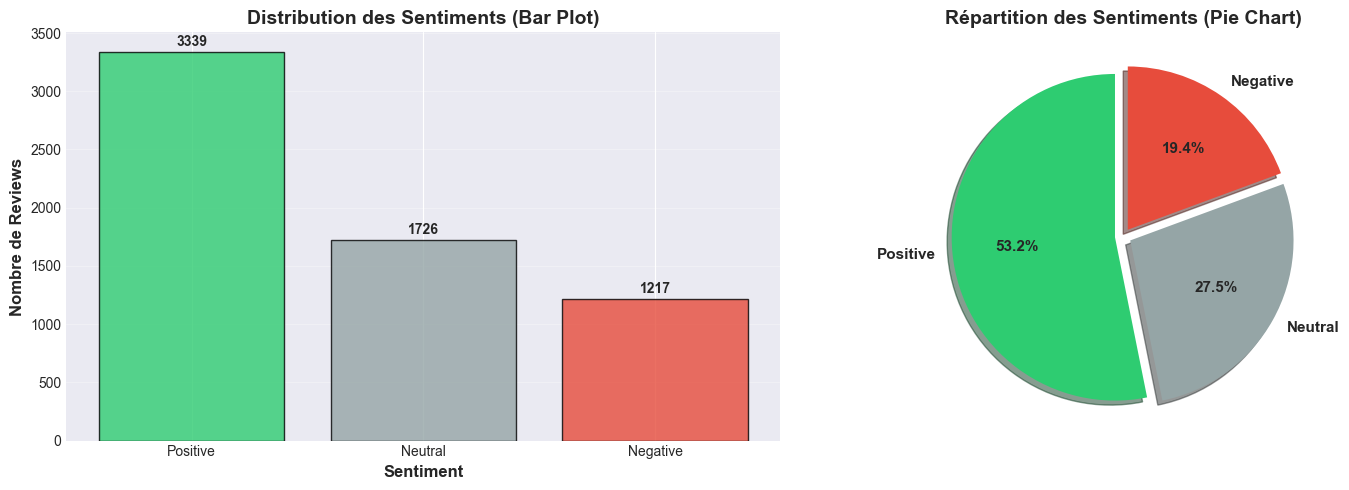

In [6]:
# =============================================================================
# 4. ANALYSE DE LA DISTRIBUTION DES SENTIMENTS
# =============================================================================

print("\n" + "="*80)
print("😊😐😢 DISTRIBUTION DES SENTIMENTS")
print("="*80)

# Comptage des sentiments
sentiment_counts = df['sentiment_label'].value_counts()
sentiment_percentages = (sentiment_counts / len(df)) * 100

print("\n📊 Répartition des sentiments:")
for sentiment, count in sentiment_counts.items():
    percentage = sentiment_percentages[sentiment]
    print(f"  {sentiment}: {count} reviews ({percentage:.2f}%)")

# Visualisation 1: Bar Plot
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Graphique en barres
axes[0].bar(sentiment_counts.index, sentiment_counts.values, 
            color=['#2ecc71', '#95a5a6', '#e74c3c'], alpha=0.8, edgecolor='black')
axes[0].set_xlabel('Sentiment', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Nombre de Reviews', fontsize=12, fontweight='bold')
axes[0].set_title('Distribution des Sentiments (Bar Plot)', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Ajouter les valeurs sur les barres
for i, v in enumerate(sentiment_counts.values):
    axes[0].text(i, v + 50, str(v), ha='center', fontweight='bold')

# Graphique en camembert
colors = ['#2ecc71', '#95a5a6', '#e74c3c']
explode = (0.05, 0.05, 0.05)
axes[1].pie(sentiment_counts.values, labels=sentiment_counts.index, 
            autopct='%1.1f%%', startangle=90, colors=colors, explode=explode,
            shadow=True, textprops={'fontsize': 11, 'fontweight': 'bold'})
axes[1].set_title('Répartition des Sentiments (Pie Chart)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()




📏 ANALYSE DE LA LONGUEUR DES REVIEWS

📈 Statistiques de longueur (en caractères):
count    6282.000000
mean       72.565903
std        14.106173
min        34.000000
25%        63.000000
50%        72.000000
75%        80.750000
max       140.000000
Name: review_length, dtype: float64

📊 Statistiques de longueur par sentiment:


,count,mean,std,min,25%,50%,75%,max
sentiment_label,,,,,,,,
Negative,1217.0,70.201315,13.852004,34.0,60.0,69.0,79.0,130.0
Neutral,1726.0,72.264774,14.159874,39.0,63.0,72.0,81.0,127.0
Positive,3339.0,73.583408,14.063661,35.0,64.0,73.0,81.0,140.0


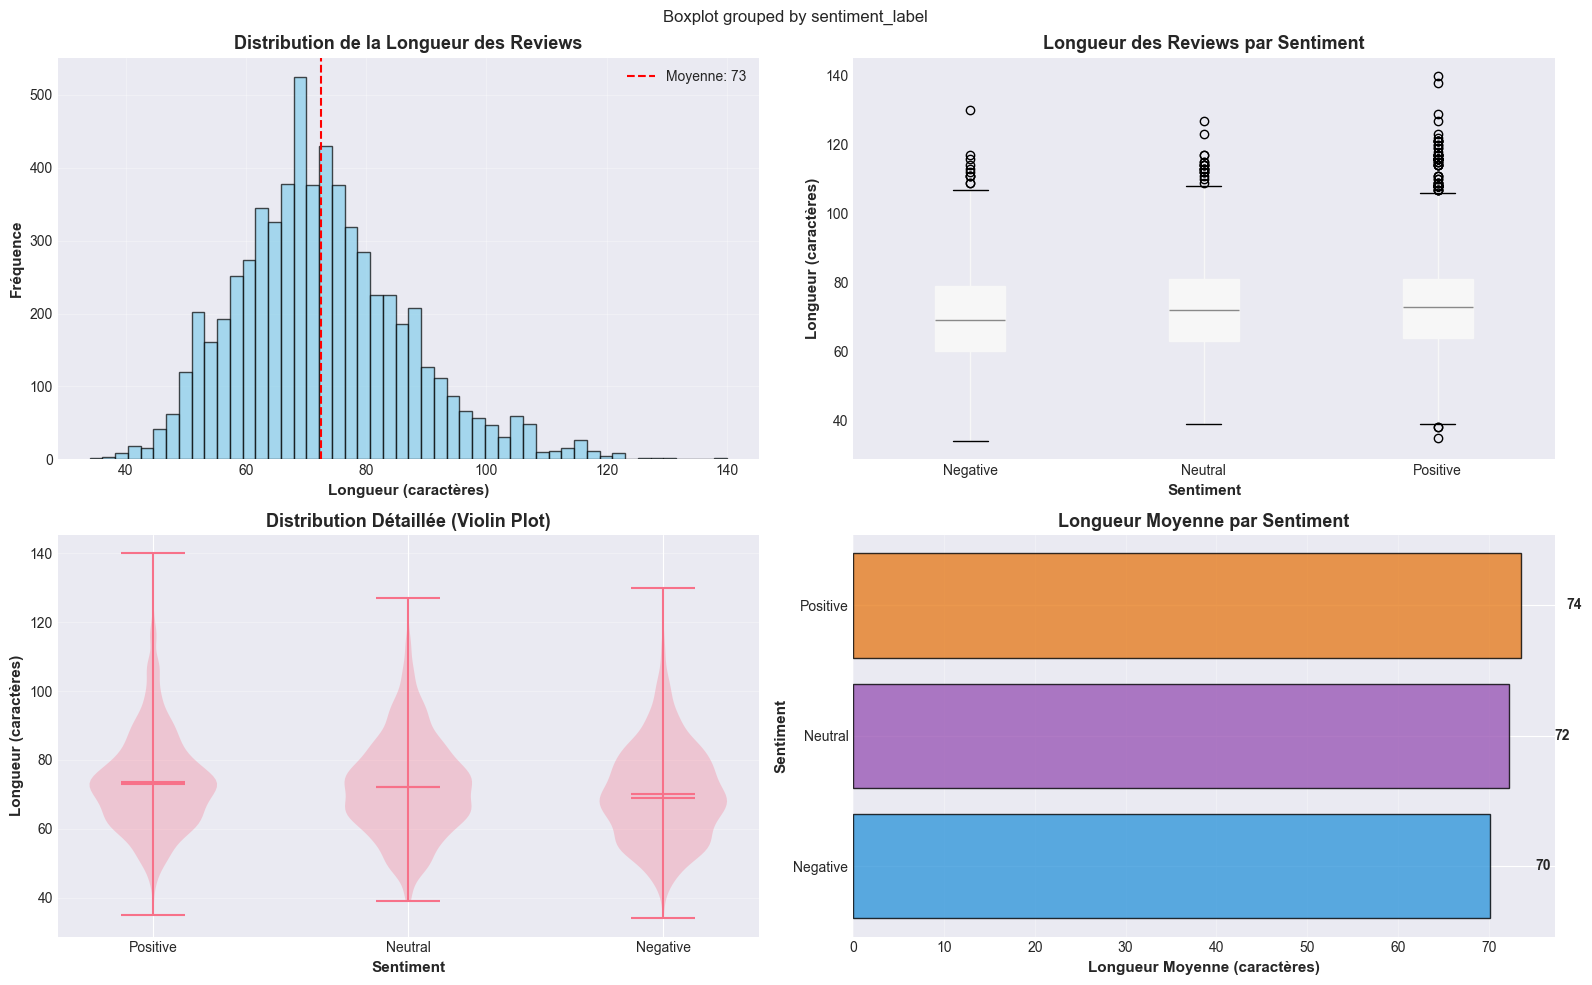

In [7]:
# =============================================================================
# 5. ANALYSE DE LA LONGUEUR DES REVIEWS
# =============================================================================

print("\n" + "="*80)
print("📏 ANALYSE DE LA LONGUEUR DES REVIEWS")
print("="*80)

# Statistiques générales
print("\n📈 Statistiques de longueur (en caractères):")
print(df['review_length'].describe())

# Statistiques par sentiment
print("\n📊 Statistiques de longueur par sentiment:")
length_by_sentiment = df.groupby('sentiment_label')['review_length'].describe()
display(length_by_sentiment)

# Visualisation
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Histogramme général
axes[0, 0].hist(df['review_length'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Longueur (caractères)', fontsize=11, fontweight='bold')
axes[0, 0].set_ylabel('Fréquence', fontsize=11, fontweight='bold')
axes[0, 0].set_title('Distribution de la Longueur des Reviews', fontsize=13, fontweight='bold')
axes[0, 0].axvline(df['review_length'].mean(), color='red', linestyle='--', 
                    label=f'Moyenne: {df["review_length"].mean():.0f}')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Box plot par sentiment
df.boxplot(column='review_length', by='sentiment_label', ax=axes[0, 1], 
           patch_artist=True, grid=False)
axes[0, 1].set_xlabel('Sentiment', fontsize=11, fontweight='bold')
axes[0, 1].set_ylabel('Longueur (caractères)', fontsize=11, fontweight='bold')
axes[0, 1].set_title('Longueur des Reviews par Sentiment', fontsize=13, fontweight='bold')
plt.sca(axes[0, 1])
plt.xticks(rotation=0)

# Violin plot
parts = axes[1, 0].violinplot([df[df['sentiment_label']==sent]['review_length'].values 
                               for sent in sentiment_counts.index],
                              positions=range(len(sentiment_counts)),
                              showmeans=True, showmedians=True)
axes[1, 0].set_xticks(range(len(sentiment_counts)))
axes[1, 0].set_xticklabels(sentiment_counts.index)
axes[1, 0].set_xlabel('Sentiment', fontsize=11, fontweight='bold')
axes[1, 0].set_ylabel('Longueur (caractères)', fontsize=11, fontweight='bold')
axes[1, 0].set_title('Distribution Détaillée (Violin Plot)', fontsize=13, fontweight='bold')
axes[1, 0].grid(alpha=0.3, axis='y')

# Comparaison des moyennes
sentiment_means = df.groupby('sentiment_label')['review_length'].mean().sort_values()
axes[1, 1].barh(sentiment_means.index, sentiment_means.values, 
                color=['#3498db', '#9b59b6', '#e67e22'], alpha=0.8, edgecolor='black')
axes[1, 1].set_xlabel('Longueur Moyenne (caractères)', fontsize=11, fontweight='bold')
axes[1, 1].set_ylabel('Sentiment', fontsize=11, fontweight='bold')
axes[1, 1].set_title('Longueur Moyenne par Sentiment', fontsize=13, fontweight='bold')
axes[1, 1].grid(alpha=0.3, axis='x')

# Ajouter les valeurs
for i, v in enumerate(sentiment_means.values):
    axes[1, 1].text(v + 5, i, f'{v:.0f}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()


📝 ANALYSE DES MOTS

📊 Statistiques du nombre de mots:
count    6282.000000
mean       13.671601
std         2.811589
min         6.000000
25%        12.000000
50%        13.000000
75%        16.000000
max        26.000000
Name: word_count, dtype: float64

📈 Nombre moyen de mots par sentiment:
  Neutral: 13.85 mots en moyenne
  Positive: 13.63 mots en moyenne
  Negative: 13.53 mots en moyenne


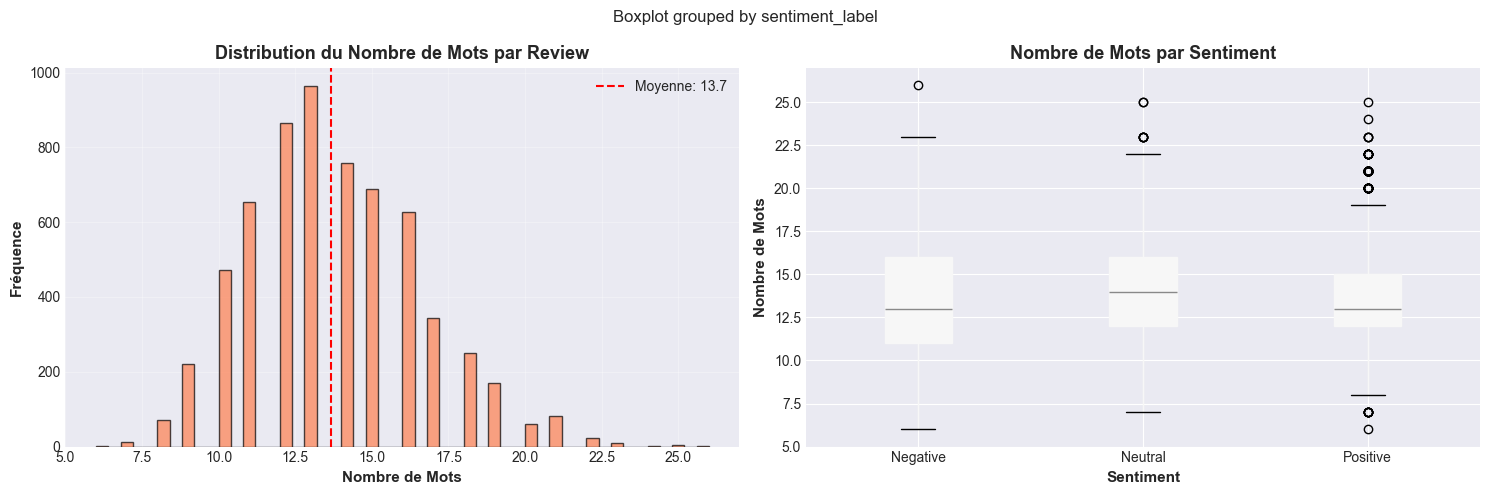

In [8]:
# =============================================================================
# 6. ANALYSE DES MOTS
# =============================================================================

print("\n" + "="*80)
print("📝 ANALYSE DES MOTS")
print("="*80)

# Compter les mots par review
df['word_count'] = df['review'].apply(lambda x: len(str(x).split()))

print("\n📊 Statistiques du nombre de mots:")
print(df['word_count'].describe())

# Nombre moyen de mots par sentiment
print("\n📈 Nombre moyen de mots par sentiment:")
word_count_by_sentiment = df.groupby('sentiment_label')['word_count'].mean().sort_values(ascending=False)
for sentiment, count in word_count_by_sentiment.items():
    print(f"  {sentiment}: {count:.2f} mots en moyenne")

# Visualisation
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogramme du nombre de mots
axes[0].hist(df['word_count'], bins=50, color='coral', edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Nombre de Mots', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Fréquence', fontsize=11, fontweight='bold')
axes[0].set_title('Distribution du Nombre de Mots par Review', fontsize=13, fontweight='bold')
axes[0].axvline(df['word_count'].mean(), color='red', linestyle='--', 
                label=f'Moyenne: {df["word_count"].mean():.1f}')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Box plot du nombre de mots par sentiment
df.boxplot(column='word_count', by='sentiment_label', ax=axes[1], patch_artist=True)
axes[1].set_xlabel('Sentiment', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Nombre de Mots', fontsize=11, fontweight='bold')
axes[1].set_title('Nombre de Mots par Sentiment', fontsize=13, fontweight='bold')
plt.sca(axes[1])
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


🔤 MOTS LES PLUS FRÉQUENTS

📊 Top 20 des mots les plus fréquents:
   1. marrakech       :  1898 occurrences
   2. jemaa           :   690 occurrences
   3. elfna           :   690 occurrences
   4. got             :   617 occurrences
   5. locals          :   615 occurrences
   6. square          :   610 occurrences
   7. tagine          :   605 occurrences
   8. city            :   570 occurrences
   9. heat            :   550 occurrences
  10. food            :   514 occurrences
  11. riad            :   501 occurrences
  12. careful         :   474 occurrences
  13. majorelle       :   461 occurrences
  14. garden          :   453 occurrences
  15. trip            :   449 occurrences
  16. atlas           :   448 occurrences
  17. mountains       :   447 occurrences
  18. experience      :   428 occurrences
  19. much            :   427 occurrences
  20. stunning        :   418 occurrences


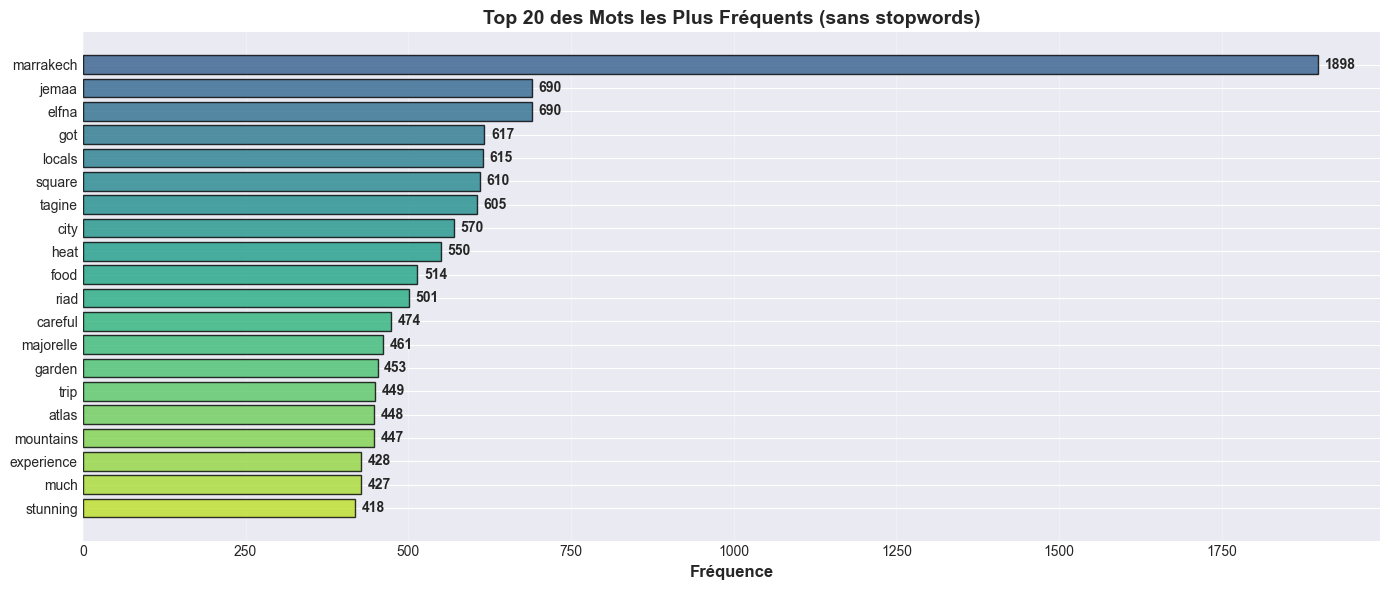

In [9]:
# =============================================================================
# 7. ANALYSE DES MOTS LES PLUS FRÉQUENTS
# =============================================================================

print("\n" + "="*80)
print("🔤 MOTS LES PLUS FRÉQUENTS")
print("="*80)

# Fonction pour nettoyer et extraire les mots
def extract_words(text):
    """Extrait et nettoie les mots d'un texte"""
    # Convertir en minuscules et garder uniquement les lettres
    text = re.sub(r'[^a-zA-Z\s]', '', str(text).lower())
    words = text.split()
    # Filtrer les stopwords et les mots courts
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words and len(word) > 2]
    return words

# Extraire tous les mots
all_words = []
for review in df['review']:
    all_words.extend(extract_words(review))

# Compter les mots les plus fréquents
word_freq = Counter(all_words)
most_common = word_freq.most_common(20)

print("\n📊 Top 20 des mots les plus fréquents:")
for i, (word, count) in enumerate(most_common, 1):
    print(f"  {i:2d}. {word:15s} : {count:5d} occurrences")

# Visualisation
fig, ax = plt.subplots(figsize=(14, 6))
words, counts = zip(*most_common)
ax.barh(range(len(words)), counts, color=plt.cm.viridis(np.linspace(0.3, 0.9, len(words))), 
        edgecolor='black', alpha=0.8)
ax.set_yticks(range(len(words)))
ax.set_yticklabels(words)
ax.invert_yaxis()
ax.set_xlabel('Fréquence', fontsize=12, fontweight='bold')
ax.set_title('Top 20 des Mots les Plus Fréquents (sans stopwords)', 
             fontsize=14, fontweight='bold')
ax.grid(alpha=0.3, axis='x')

# Ajouter les valeurs
for i, v in enumerate(counts):
    ax.text(v + 10, i, str(v), va='center', fontweight='bold')

plt.tight_layout()
plt.show()


☁️  NUAGES DE MOTS PAR SENTIMENT


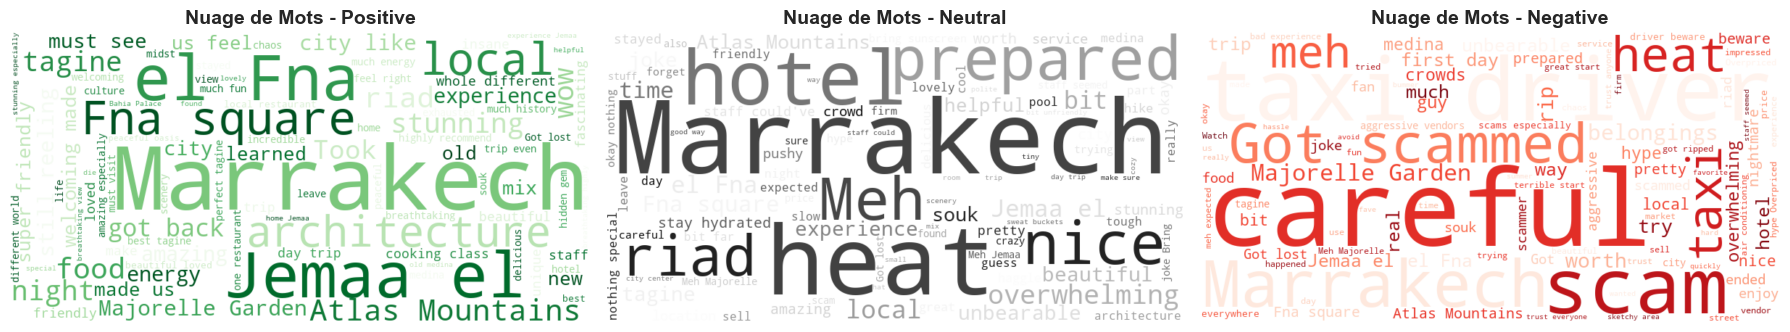

In [10]:
# =============================================================================
# 8. NUAGES DE MOTS (WORD CLOUDS)
# =============================================================================

print("\n" + "="*80)
print("☁️  NUAGES DE MOTS PAR SENTIMENT")
print("="*80)

# Fonction pour créer un word cloud
def create_wordcloud(text, title, colormap='viridis'):
    """Crée un nuage de mots à partir d'un texte"""
    wordcloud = WordCloud(width=800, height=400, 
                         background_color='white',
                         colormap=colormap,
                         stopwords=stopwords.words('english'),
                         max_words=100,
                         relative_scaling=0.5,
                         min_font_size=10).generate(text)
    return wordcloud

# Créer les nuages de mots pour chaque sentiment
sentiments = df['sentiment_label'].unique()
n_sentiments = len(sentiments)

fig, axes = plt.subplots(1, n_sentiments, figsize=(18, 5))

colormaps = {'Positive': 'Greens', 'Neutral': 'Greys', 'Negative': 'Reds'}

for idx, sentiment in enumerate(sentiments):
    # Récupérer toutes les reviews pour ce sentiment
    text = ' '.join(df[df['sentiment_label'] == sentiment]['review'].astype(str))
    
    # Créer le word cloud
    colormap = colormaps.get(sentiment, 'viridis')
    wordcloud = create_wordcloud(text, sentiment, colormap)
    
    # Afficher
    if n_sentiments > 1:
        ax = axes[idx]
    else:
        ax = axes
    
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(f'Nuage de Mots - {sentiment}', fontsize=14, fontweight='bold')
    ax.axis('off')

plt.tight_layout()
plt.show()



📊 TOP 10 DES MOTS PAR SENTIMENT

Positive:
   1. marrakech       :  1234
   2. jemaa           :   510
   3. elfna           :   510
   4. tagine          :   474
   5. square          :   452
   6. locals          :   430
   7. city            :   422
   8. architecture    :   375
   9. trip            :   340
  10. stunning        :   340

Neutral:
   1. marrakech       :   427
   2. heat            :   370
   3. bit             :   280
   4. meh             :   251
   5. hotel           :   214
   6. nice            :   210
   7. prepared        :   203
   8. joke            :   183
   9. riad            :   164
  10. food            :   159

Negative:
   1. careful         :   433
   2. taxi            :   350
   3. got             :   269
   4. marrakech       :   237
   5. scammed         :   223
   6. driver          :   217
   7. scams           :   215
   8. meh             :   161
   9. heat            :   145
  10. drivers         :   125


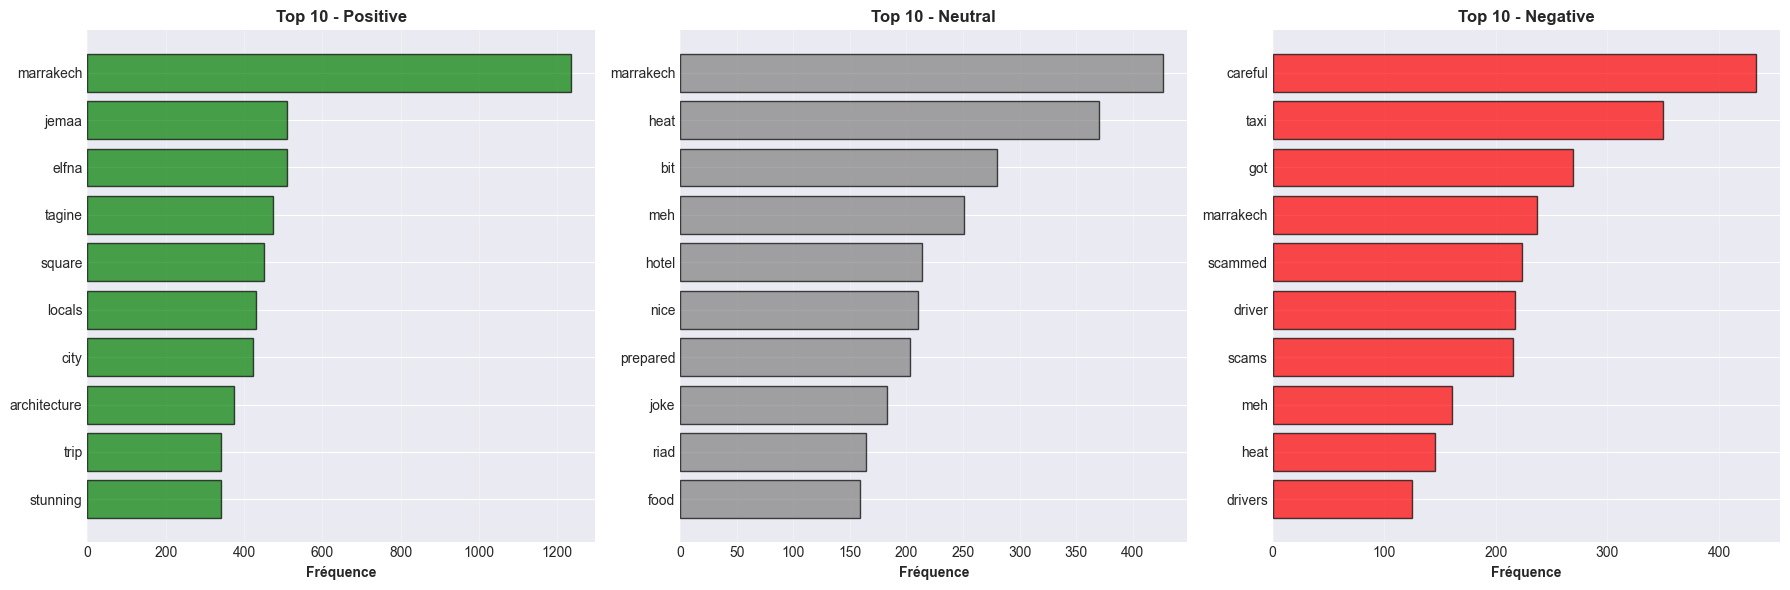

In [11]:
# =============================================================================
# 9. MOTS LES PLUS FRÉQUENTS PAR SENTIMENT
# =============================================================================

print("\n" + "="*80)
print("📊 TOP 10 DES MOTS PAR SENTIMENT")
print("="*80)

fig, axes = plt.subplots(1, n_sentiments, figsize=(18, 6))

for idx, sentiment in enumerate(sentiments):
    # Extraire les mots pour ce sentiment
    sentiment_words = []
    sentiment_reviews = df[df['sentiment_label'] == sentiment]['review']
    
    for review in sentiment_reviews:
        sentiment_words.extend(extract_words(review))
    
    # Compter les mots
    sentiment_freq = Counter(sentiment_words)
    top_10 = sentiment_freq.most_common(10)
    
    print(f"\n{sentiment}:")
    for i, (word, count) in enumerate(top_10, 1):
        print(f"  {i:2d}. {word:15s} : {count:5d}")
    
    # Visualiser
    if n_sentiments > 1:
        ax = axes[idx]
    else:
        ax = axes
    
    words, counts = zip(*top_10)
    colors_map = {'Positive': 'green', 'Neutral': 'gray', 'Negative': 'red'}
    color = colors_map.get(sentiment, 'blue')
    
    ax.barh(range(len(words)), counts, color=color, alpha=0.7, edgecolor='black')
    ax.set_yticks(range(len(words)))
    ax.set_yticklabels(words)
    ax.invert_yaxis()
    ax.set_xlabel('Fréquence', fontsize=10, fontweight='bold')
    ax.set_title(f'Top 10 - {sentiment}', fontsize=12, fontweight='bold')
    ax.grid(alpha=0.3, axis='x')

plt.tight_layout()
plt.show()


In [13]:

# =============================================================================
# 10. RÉSUMÉ ET RECOMMANDATIONS
# =============================================================================

print("\n" + "="*80)
print("📋 RÉSUMÉ DE L'ANALYSE EXPLORATOIRE")
print("="*80)

print(f"""
✅ STATISTIQUES GÉNÉRALES:
   • Total de reviews: {len(df)}
   • Colonnes: {list(df.columns)}
   • Valeurs manquantes: {df.isnull().sum().sum()}
   • Doublons: {duplicates}

📊 DISTRIBUTION DES SENTIMENTS:
""")
for sentiment, count in sentiment_counts.items():
    print(f"   • {sentiment}: {count} ({sentiment_percentages[sentiment]:.2f}%)")

print(f"""
📏 LONGUEUR DES REVIEWS:
   • Longueur moyenne: {df['review_length'].mean():.0f} caractères
   • Longueur médiane: {df['review_length'].median():.0f} caractères
   • Min: {df['review_length'].min()}, Max: {df['review_length'].max()}

📝 NOMBRE DE MOTS:
   • Moyenne: {df['word_count'].mean():.1f} mots
   • Médiane: {df['word_count'].median():.1f} mots
   • Min: {df['word_count'].min()}, Max: {df['word_count'].max()}

""")

print("\n" + "="*80)
print("✅ ANALYSE EXPLORATOIRE TERMINÉE!")



📋 RÉSUMÉ DE L'ANALYSE EXPLORATOIRE

✅ STATISTIQUES GÉNÉRALES:
   • Total de reviews: 6282
   • Colonnes: ['ID', 'review', 'sentiment_label', 'review_length', 'word_count']
   • Valeurs manquantes: 0
   • Doublons: 0

📊 DISTRIBUTION DES SENTIMENTS:

   • Positive: 3339 (53.15%)
   • Neutral: 1726 (27.48%)
   • Negative: 1217 (19.37%)

📏 LONGUEUR DES REVIEWS:
   • Longueur moyenne: 73 caractères
   • Longueur médiane: 72 caractères
   • Min: 34, Max: 140

📝 NOMBRE DE MOTS:
   • Moyenne: 13.7 mots
   • Médiane: 13.0 mots
   • Min: 6, Max: 26



✅ ANALYSE EXPLORATOIRE TERMINÉE!
